In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras import layers
# from tensorflow.keras.layers import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import LSTM
plt.style.use('fivethirtyeight')
from keras.layers import Activation, Dense
import requests
from tkinter import *
import math
import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Updated2.csv', usecols=['Year','Month','Day','avgtempC','windspeedKmph','humidity', 'visibilityKm','pressureInches','cloudcover','HeatIndexC','weatherDesc','totalprecipMM'])

In [3]:
df = dataset
dataset

,Year,Month,Day,avgtempC,windspeedKmph,humidity,visibilityKm,pressureInches,cloudcover,HeatIndexC,weatherDesc,totalprecipMM
0,2008,7,1,24,16,67,10,30,60,26,1,0.3
1,2008,7,2,24,16,69,10,30,58,26,1,3.9
2,2008,7,3,25,12,68,9,30,39,26,1,9.8
3,2008,7,4,24,12,71,9,30,33,26,1,8.8
4,2008,7,5,24,13,72,10,30,31,25,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4703,2021,5,17,30,21,49,10,30,12,31,1,0.1
4704,2021,5,18,28,18,56,9,30,57,30,1,9.4
4705,2021,5,19,28,24,58,10,30,32,29,1,2.1
4706,2021,5,20,28,22,55,10,30,26,29,1,0.4


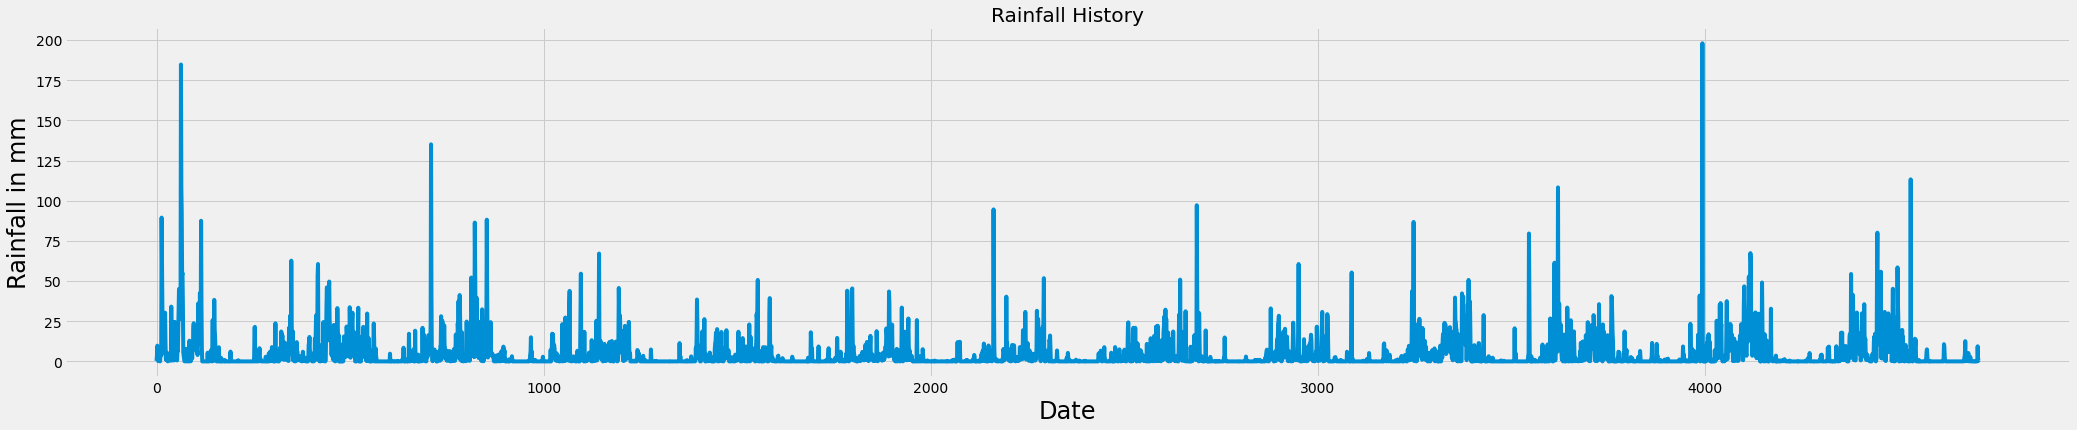

In [4]:
#Visualise the closing temp
plt.figure(figsize=(32,6))
plt.title('Rainfall History')
plt.plot(dataset['totalprecipMM'])
plt.xlabel('Date',fontsize=24)
plt.ylabel('Rainfall in mm',fontsize=24)
plt.show()

In [5]:
# # #Appending latest rain data to keep our dataset updated
# city = 'Bengaluru'
# apikey = '006ab4b0040b41589c3181415211905'


# def apicall(city,apikey): 
    
#     url = 'http://api.weatherapi.com/v1/current.json?key='+apikey+'&q='+city+'&aqi=no'
#     response = requests.get(url)
#     status =  (response.status_code)
#     api_string_data = response.text
#     print("This is the api call data:\n")
#     print(api_string_data,"\n")
#     print("The value of rain in mm which we append to our database:\n")
#     rain_mm = api_string_data[533:536]
#     print(rain_mm)
#     return rain_mm
    
    
# to_append = apicall(city, apikey)

In [6]:
# dfnew = pd.DataFrame({"totalprecipMM":[to_append]})
# dataset.append(dfnew, ignore_index = True)

In [7]:
## Converting the temp values into a numpy array
data = dataset.filter(['totalprecipMM'])
dataset = data.values
print(data)
print(type(data))

      totalprecipMM
0               0.3
1               3.9
2               9.8
3               8.8
4               0.2
...             ...
4703            0.1
4704            9.4
4705            2.1
4706            0.4
4707            0.7

[4708 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [8]:
print(len(dataset))
dataset

4708


array([[0.3],
       [3.9],
       [9.8],
       ...,
       [2.1],
       [0.4],
       [0.7]])

In [9]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

3767

In [10]:
# Here we scale the data to process the input data before we present it to the neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00151515],
       [0.01969697],
       [0.04949495],
       ...,
       [0.01060606],
       [0.0020202 ],
       [0.00353535]])

In [11]:
#Create training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if(i<=60):
        print(x_train)
        print() 
        print()
        print(y_train)


[array([0.00151515, 0.01969697, 0.04949495, 0.04444444, 0.0010101 ,
       0.00606061, 0.0040404 , 0.00656566, 0.00808081, 0.        ,
       0.01515152, 0.02070707, 0.01919192, 0.4520202 , 0.30454545,
       0.14040404, 0.04040404, 0.06565657, 0.02575758, 0.08989899,
       0.06868687, 0.08737374, 0.1530303 , 0.06313131, 0.00606061,
       0.00757576, 0.00505051, 0.02727273, 0.00151515, 0.        ,
       0.00252525, 0.00353535, 0.00959596, 0.00454545, 0.01313131,
       0.01262626, 0.0020202 , 0.01060606, 0.17222222, 0.04090909,
       0.04646465, 0.0030303 , 0.06313131, 0.07121212, 0.01111111,
       0.0030303 , 0.03888889, 0.12424242, 0.11414141, 0.07929293,
       0.06767677, 0.04227273, 0.01464646, 0.0030303 , 0.03636364,
       0.03232323, 0.09646465, 0.1540404 , 0.22777778, 0.15353535])]


[0.1409090909090909]


In [12]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data to 3-D because LSTM model needs 3-D data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(3707, 60, 1)
(3707,)


In [14]:
#Build the stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, activation='relu', return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
#Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. 
#A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

In [15]:
#Compile the model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

3707/3707 [==============================] - 100s 26ms/step - loss: 0.0027


In [17]:
#Create the testing dataset
#Create a new array containing scaled values from index 3460 to 
test_data = scaled_data[training_data_len - 60:, :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#We do reverse scale so that we can find the RMSE values

In [21]:
#Get the root mean squared error (RMSE)
RMSE = np.sqrt( np.mean(predictions - y_test)**2 )
RMSE

1.8411750470160426

3767    4.517951
3768    3.514400
3769    2.935427
3770    2.637581
3771    2.441990
          ...   
4703    2.315001
4704    2.329814
4705    4.275177
4706    4.049218
4707    3.496588
Name: Predictions, Length: 941, dtype: float32
      totalprecipMM  Predictions
3767            0.0     4.517951
3768            0.0     3.514400
3769            0.2     2.935427
3770            0.0     2.637581
3771            0.0     2.441990
...             ...          ...
4703            0.1     2.315001
4704            9.4     2.329814
4705            2.1     4.275177
4706            0.4     4.049218
4707            0.7     3.496588

[941 rows x 2 columns]


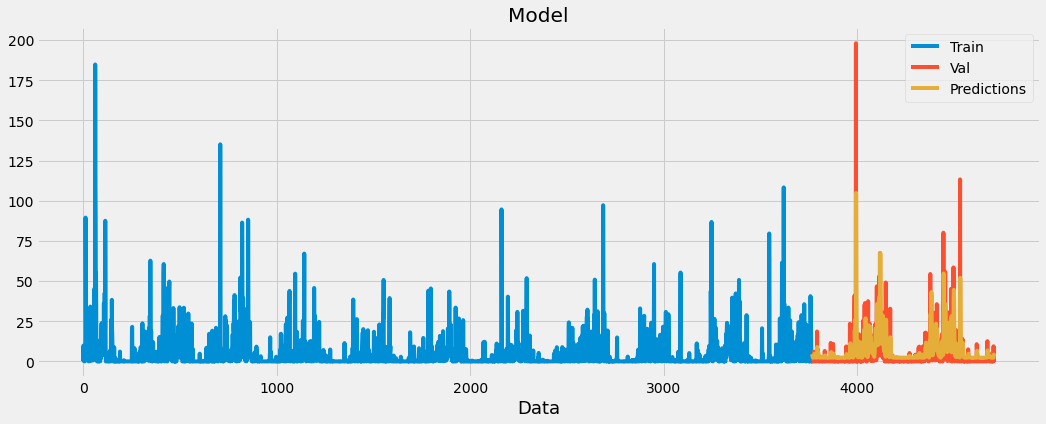

In [22]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# #Visualize the data
plt.figure( figsize = (16,6))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.plot(train['totalprecipMM'])
plt.plot(valid[['totalprecipMM', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper right')
# plt.show()
print(valid['Predictions'])
print(valid)

In [23]:
#Show the actual Temp and predicted Temp
print(valid)

      totalprecipMM  Predictions
3767            0.0     4.517951
3768            0.0     3.514400
3769            0.2     2.935427
3770            0.0     2.637581
3771            0.0     2.441990
...             ...          ...
4703            0.1     2.315001
4704            9.4     2.329814
4705            2.1     4.275177
4706            0.4     4.049218
4707            0.7     3.496588

[941 rows x 2 columns]


In [24]:
#Create a new dataframe
df1 = df
df1 = df1.filter(['totalprecipMM'])
#Get the last 60 day Temp values and convert the dataframe to an array
last_60_days = df1[-3690:].values
#Scale the data to be values betweeen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled temp
pred_rain = model.predict(X_test)
pred_rain = scaler.inverse_transform(pred_rain)
print(pred_rain)
print('This is the predicted rain in mm for today:')

[[3.1431715]]
This is the predicted rain in mm for today:
